<a href="https://colab.research.google.com/github/SquareRoot49/Pytorch_Learning/blob/main/Pytorch03_Computer_Vision_and_Convolutional_Netural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
from torch import nn

In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


## Get data from torchvision.datasets

In [ ]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.8MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 174kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.20MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.72MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

## Visiualizing our data

Text(0.5, 1.0, '9')

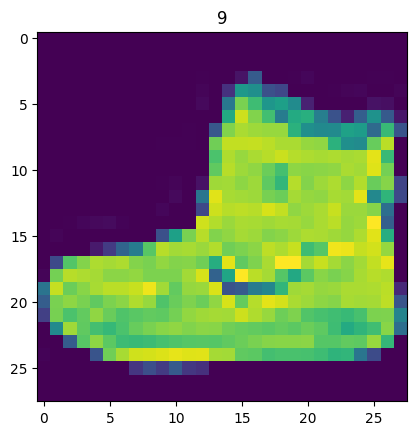

In [ ]:
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

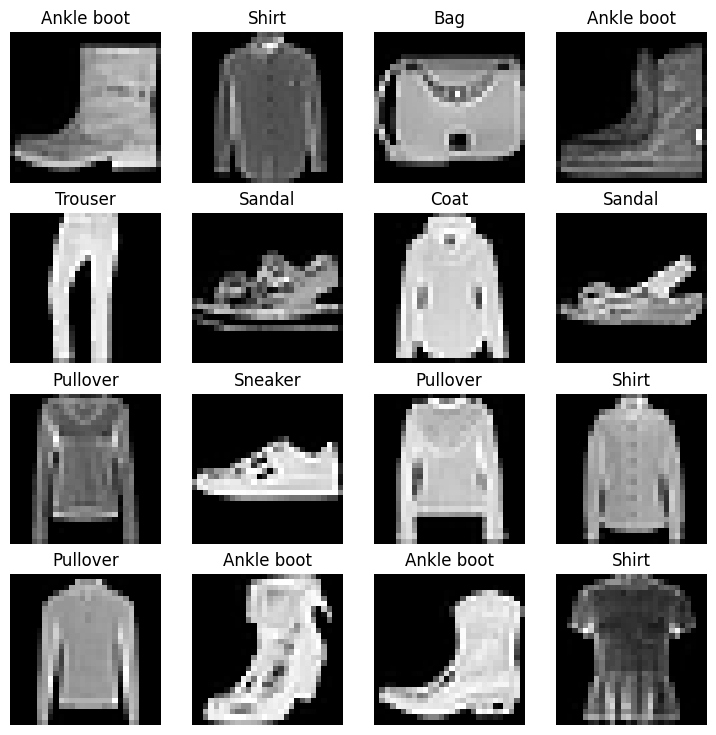

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(train_data.classes[label])
  plt.axis(False)

## Prepare dataloader

In [ ]:
## Turn our data into batches

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
Batch_size = 32

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = Batch_size,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = Batch_size,
    shuffle = False
)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c266bb5c4d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c266ba6cfd0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
## When we make some batches, how can we visualize these batches
# What's inside the batched

In [ ]:
train_feature_batch, train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
train_feature_batch[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

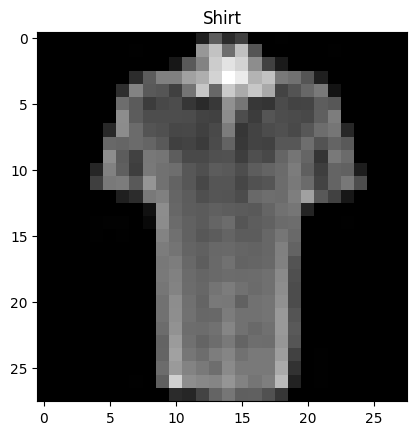

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feature_batch), size = [1]).item()
img, label = train_feature_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(True)

## Build a baseline model!

In [ ]:
## Create a flatten layer

In [ ]:
flatten_model = nn.Flatten()

x = train_feature_batch[0]
x.shape

torch.Size([1, 28, 28])

In [ ]:
train_feature_batch.shape

torch.Size([32, 1, 28, 28])

In [ ]:
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [ ]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [ ]:
class FashionMNISTModel0(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModel0(input_shape = 28 * 28,
                             hidden_units = 10,
                             output_shape = len(class_names)).to('cpu')

In [ ]:
model_0

FashionMNISTModel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])

In [ ]:
dummy_x

tensor([[[[0.0851, 0.8142, 0.2461, 0.7762, 0.4256, 0.2940, 0.8762, 0.4034,
           0.2302, 0.4234, 0.1820, 0.0186, 0.4124, 0.4718, 0.2150, 0.9432,
           0.3883, 0.3730, 0.8962, 0.5556, 0.3824, 0.6150, 0.0482, 0.9916,
           0.6319, 0.6758, 0.1312, 0.8823],
          [0.0891, 0.3263, 0.1794, 0.2475, 0.6067, 0.0041, 0.0105, 0.6142,
           0.6648, 0.5072, 0.3100, 0.3601, 0.4309, 0.3986, 0.1907, 0.8764,
           0.6012, 0.1655, 0.3984, 0.1382, 0.2079, 0.8798, 0.6526, 0.7190,
           0.4351, 0.3752, 0.5646, 0.1448],
          [0.0025, 0.8515, 0.5102, 0.8033, 0.8762, 0.7187, 0.3291, 0.4083,
           0.4739, 0.5299, 0.5194, 0.1091, 0.2251, 0.8644, 0.5160, 0.2733,
           0.8380, 0.3516, 0.2966, 0.8494, 0.1055, 0.2605, 0.8784, 0.4511,
           0.2938, 0.9149, 0.5761, 0.0302],
          [0.1303, 0.3732, 0.4726, 0.1235, 0.3116, 0.6690, 0.0337, 0.0314,
           0.6300, 0.5954, 0.0171, 0.0348, 0.9154, 0.9990, 0.2815, 0.9981,
           0.8453, 0.9444, 0.2848, 0.3776, 

In [ ]:
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
# Set up loss function and optimizer

In [ ]:
import requests
from pathlib import Path

# Download helper function from Learn Pytorch
if Path('helper_functions.py').is_file():
  print('Already exists')
else:
  print('Download the file...')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

Download the file...


In [ ]:
from helper_functions import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [ ]:
# Create fucnrion to time our experiment

In [ ]:
from timeit import default_timer as timer

In [ ]:
def print_train_time(start, end, device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start_time, end_time, device = 'cpu')

Train time on cpu: 0.000 seconds


2.5226000019529238e-05

## Create our first model

In [ ]:
from tqdm.auto import tqdm

In [ ]:
len(train_dataloader)

1875

In [ ]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

In [ ]:
for batch in train_dataloader:
  inputs, labels = batch
  print(inputs, inputs.shape)
  print(labels, labels.shape)
  print(len(inputs))
  break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [ ]:
len(train_dataloader.dataset)

60000

In [ ]:
torch.manual_seed(42)

train_time_start_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  ## since we need to cumulate loss in each batch:
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)

    train_loss = train_loss + loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f'Look at {batch} * {len(X)} / {len(train_dataloader.dataset)} samples.')

  train_loss = train_loss / len(train_dataloader)

   ## Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

      # Caculate test loss for each batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_on_cpu = print_train_time(start = train_time_start_cpu,
                                           end = train_time_end_on_cpu,
                                           device = str(next(model_0.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Look at 0 * 32 / 60000 samples.
Look at 400 * 32 / 60000 samples.
Look at 800 * 32 / 60000 samples.
Look at 1200 * 32 / 60000 samples.
Look at 1600 * 32 / 60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
Look at 0 * 32 / 60000 samples.
Look at 400 * 32 / 60000 samples.
Look at 800 * 32 / 60000 samples.
Look at 1200 * 32 / 60000 samples.
Look at 1600 * 32 / 60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
Look at 0 * 32 / 60000 samples.
Look at 400 * 32 / 60000 samples.
Look at 800 * 32 / 60000 samples.
Look at 1200 * 32 / 60000 samples.
Look at 1600 * 32 / 60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, 

## Make prediction

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  loss, acc = 0, 0
  model.eval()
  model.to(device)
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {'model_name': model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc': acc,
          }


In [ ]:
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Use Gpu to caculate

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Build a model with non-linear model

In [ ]:
# Create a model with linear and non-linear model

In [ ]:
class FashionMNISTModel1(nn.Module):
  def __init__(self,
               input,
               hidden_units,
               output):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output),
        nn.ReLU()
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModel1(input = 784,
                             hidden_units = 10,
                             output = len(class_names)).to(device)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimiaer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [ ]:

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)


## Functionizing

In [ ]:
def train_step(model,
               dataloader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device
               ):
  train_loss, train_acc = 0, 0
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  print(f'\nTrain loss: {train_loss:.4f} | Train acc: {train_acc:.4f}')

In [ ]:
len(train_dataloader)

1875

In [ ]:
def test_step(model,
              dataloader,
              loss_fn,
              accuracy_fn,
              device
              ):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:

      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [ ]:
device

'cuda'

In [ ]:
from itertools import accumulate
epochs = 3

from timeit import default_timer as timer
train_time_start_on_cpu = timer()

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train_step(model = model_1,
             dataloader = train_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             optimizer = optimizer,
             device = device)

  test_step(model = model_1,
            dataloader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_cpu = timer()
total_train_time_on_cpu = print_train_time(start = train_time_start_on_cpu,
                                           end = train_time_end_on_cpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 1.0588 | Train acc: 62.1917
Test loss: 0.99506 | Test acc: 64.13%

Epoch: 1

Train loss: 0.9133 | Train acc: 66.3967
Test loss: 0.90508 | Test acc: 66.86%

Epoch: 2

Train loss: 0.8798 | Train acc: 67.2433
Test loss: 0.89476 | Test acc: 66.46%

Train time on None: 28.224 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModel0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
## Get model_1 result

In [ ]:
model_1_result = eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            device = device)
model_1_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel1',
 'model_loss': 0.8947636485099792,
 'model_acc': 66.46365814696486}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModel0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Build a Convolutional Neutral Network

In [ ]:
#Create a covolutional network

In [ ]:
class FashionMNISTModel2(nn.Module):
  def __init__(self,
               input,
               hidden_units,
               output):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                 out_channels = hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7, out_features = output)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f'print out put of conv_1{x.shape}')
    x = self.conv_block_2(x)
    #print(f'print out put of conv_2{x.shape}')
    x = self.classifier(x)
    return x

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
model_2 = FashionMNISTModel2(input = 1,
                             hidden_units = 10,
                             output = len(class_names)).to(device)

In [ ]:
model_2

FashionMNISTModel2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
## Transform the graph
random_image = torch.randn(size = (1, 28, 28))

model_2(random_image.unsqueeze(dim = 0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

## Stepping through Conv2d

In [ ]:
# Training with no-traing model

In [ ]:
torch.manual_seed(42)
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f'Shape of the image: {test_image.shape}')
print(f'Shape of the batch of images: {images.shape}')
print(f'Shape of the convolution kernel: {model_2.conv_block_1[0].weight.shape}')


Shape of the image: torch.Size([3, 64, 64])
Shape of the batch of images: torch.Size([32, 3, 64, 64])
Shape of the convolution kernel: torch.Size([10, 1, 3, 3])


In [ ]:
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = (3, 3),
                       stride = 1,
                       padding = 0)

In [ ]:
conv_output = conv_layer(test_image.unsqueeze(dim = 0))
conv_output.shape

torch.Size([1, 10, 62, 62])

## Stepping thorugh nn.MaxPool2d()

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim = 0))

print(test_image_through_conv.shape)

test_image_through_max_pool = max_pool_layer(test_image_through_conv)

print(test_image_through_max_pool.shape)

torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)

random_tensor = torch.randn(size = (1, 1, 2, 2 ))
random_tensor

max_pool_layer = nn.MaxPool2d(kernel_size = 2)
max_pool_tensor = max_pool_layer(random_tensor)

print(max_pool_tensor)

print(max_pool_tensor.shape)


tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


In [ ]:
## Set up loss function and optimizer

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

In [ ]:
#model_2.state_dict()

In [ ]:
## Training and test model_2

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train_step(model = model_2,
             dataloader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2,
            dataloader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)
train_time_end_model2 = timer()

timr_train_model2 = print_train_time(start = train_time_start_model2,
                                     end = train_time_end_model2,
                                     device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 0.3055 | Train acc: 88.9400
Test loss: 0.31906 | Test acc: 88.47%

Epoch: 1

Train loss: 0.2900 | Train acc: 89.4567
Test loss: 0.31134 | Test acc: 88.65%

Epoch: 2

Train loss: 0.2789 | Train acc: 89.8500
Test loss: 0.32729 | Test acc: 88.01%

Train time on cuda: 34.246 seconds


In [ ]:
model_2_results = eval_model(model = model_2,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            device = device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel2',
 'model_loss': 0.32728761434555054,
 'model_acc': 88.00918530351437}

In [ ]:
import pandas as pd

In [ ]:
compare_result = pd.DataFrame({'model_1'}: model_1_result,
                              {'model_2': })